In [3]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
#import cpi

In [39]:
data = pd.read_excel('T&D Expenses.xlsx')[['Generation Combined Costs','LSE','Year']].sort_values(by=['LSE','Year']).dropna()
data
#data['real_Generation Combined Costs'] = data.apply(
#    lambda x: cpi.inflate(x['Generation Combined Costs'], x.Year,to=2022), axis=1
#)

,Generation Combined Costs,LSE,Year
27,1.413830e+09,LADWP,2014
28,1.399614e+09,LADWP,2015
29,1.356220e+09,LADWP,2016
30,1.457860e+09,LADWP,2017
31,1.412145e+09,LADWP,2018
...,...,...,...
22,6.276200e+08,SMUD,2018
23,6.001780e+08,SMUD,2019
24,6.262760e+08,SMUD,2020
25,8.407000e+08,SMUD,2021


In [40]:
eia_sales = pd.read_csv('../datafiles/Merged EIA data - all CA utilities.csv')[['Utility Name','Year','Sales (MWh)_res','Service Type']]

#eia_sales['Utility Name'] = eia_sales['Utility Name'].str.replace("")
eia_sales = eia_sales[eia_sales['Service Type']=='Bundled']

eia_sales.loc[eia_sales['Utility Name'].str.contains('pacific gas',case=False), 'Utility Name'] = 'PG&E'
eia_sales.loc[eia_sales['Utility Name'].str.contains('sacramento',case=False), 'Utility Name'] = 'SMUD'
eia_sales.loc[eia_sales['Utility Name'].str.contains('southern california edison',case=False), 'Utility Name'] = 'SCE'
eia_sales.loc[eia_sales['Utility Name'].str.contains('san diego',case=False), 'Utility Name'] = 'SDG&E'
eia_sales.loc[eia_sales['Utility Name'].str.contains('los angeles',case=False), 'Utility Name'] = 'LADWP'
eia_sales.loc[eia_sales['Utility Name'].str.contains('marin',case=False), 'Utility Name'] = 'MCE'
eia_sales.loc[eia_sales['Utility Name'].str.contains('clean power alliance',case=False), 'Utility Name'] = 'CPA-SC'
display(eia_sales)

,Utility Name,Year,Sales (MWh)_res,Service Type
0,City of Alameda,2005,135305,Bundled
1,City of Anaheim,2005,587209,Bundled
2,City of Azusa,2005,74885,Bundled
3,Banning City of,2005,67826,Bundled
4,City of Biggs,2005,4657,Bundled
...,...,...,...,...
916,Bear Valley Electric Service,2022,85587,Bundled
917,Turlock Irrigation District,2022,813781,Bundled
918,City of Vernon,2022,326,Bundled
920,City of Moreno Valley - (CA),2022,48753,Bundled


In [33]:
merged = pd.merge(eia_sales,data,left_on=['Utility Name','Year'],right_on=['LSE','Year'],how='right')

In [25]:
merged

,Utility Name,Year,Sales (MWh)_res,Service Type,Generation Combined Costs,LSE
0,LADWP,2016,8103167.0,Bundled,1.356220e+09,LADWP
1,LADWP,2017,8214598.0,Bundled,1.457860e+09,LADWP
2,LADWP,2018,8079920.0,Bundled,1.412145e+09,LADWP
3,LADWP,2019,7851621.0,Bundled,1.560639e+09,LADWP
4,LADWP,2020,8584348.0,Bundled,1.449111e+09,LADWP
...,...,...,...,...,...,...
91,SMUD,2018,4518636.0,Bundled,6.276200e+08,SMUD
92,SMUD,2019,4497028.0,Bundled,6.001780e+08,SMUD
93,SMUD,2020,4909892.0,Bundled,6.262760e+08,SMUD
94,SMUD,2021,4752214.0,Bundled,8.407000e+08,SMUD


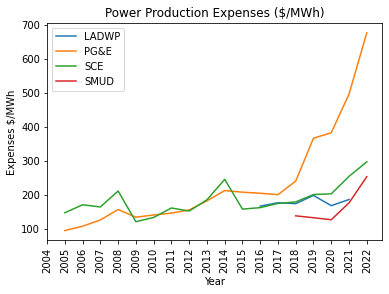

In [41]:
fig = plt.figure(facecolor="none")  # Sets the figure patch to transparent.

for lse in merged.LSE.unique():
    lse_data_filter = merged[merged['LSE']==lse]
    #display(lse_data_filter)
    plt.plot(lse_data_filter['Year'],lse_data_filter['Generation Combined Costs']/lse_data_filter['Sales (MWh)_res'],label=lse)
plt.legend()
plt.title('Power Production Expenses ($/MWh)')
plt.ylabel('Expenses $/MWh')
plt.xlabel('Year')
plt.xticks(range(2004,2023),rotation=90)
plt.show()
#fig.savefig('real power production expenses per mwh.png', facecolor="w")  # Sets the figure patch to solid white for saving.
